## Plotting and tabbing IBD graph features

This notebook processes simulated data to make plots and tables.

This was made to study the IBD graph features of complex demography simulations.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [63]:
plt.rc('font',size=14)

### Bottle v Growth

In [114]:
size = 5000
cM = 3
ne = 'three-phase-2000G.ne'
ne2 = 'bottleneck-1000G.ne'
nick = 'G3'
nick2 = 'BN'
pre = '../data/structures/structures-'
pre2 = '../data/structures/structures-'
filename = pre + ne + '-n' + str(size) + '-L' + str(cM) + '.txt'
filename2 = pre2 + ne2 + '-n' + str(size) + '-L' + str(cM) + '.txt'

In [115]:
g=open(filename)
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))


g.close()

pdtable = pd.DataFrame(table)

In [116]:
g=open(filename2)
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))


g.close()

pdtable2 = pd.DataFrame(table)

In [112]:
bins = 20
ec = 'k'

# ic = 'tab:blue'
# ic2 = 'tab:orange'
# column = 'tree_order2'
# xlab = '# trees of order 2'

# ic = 'tab:cyan'
# ic2 = 'tab:pink'
# column = 'tree_order3'
# xlab = '# trees of order 3'

# ic = 'tab:purple'
# ic2 = 'tab:olive'
# column = 'iscomplete'
# xlab = '# complete components of size >= 3'

ic = 'tab:green'
ic2 = 'tab:brown'
column = 'num_tracts'
xlab = '# of edges'

alpha = 0.5

pngname1 = 'hist-' + column + '-' + nick + '-n' + str(size) + '-L' + str(cM)
pngname2 = 'hist-' + column + '-' + nick2 + '-n' + str(size) + '-L' + str(cM)
pngname1

'hist-num_tracts-G3-n10000-L3'

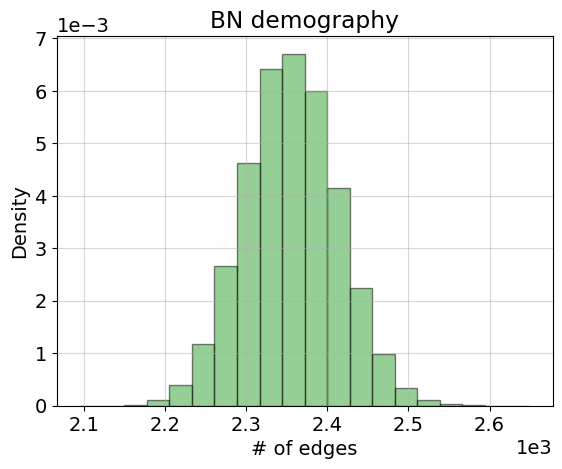

In [113]:

fig = plt.figure()
ax = plt.subplot(111)

plttable = pdtable2
pngname = pngname2
nickname = nick2

plt.hist(plttable[column],bins,edgecolor=ec,color=ic,label=nick, density=True, alpha=alpha)
plt.xlabel(xlab)
plt.ylabel('Density')

# plt.axvline(plttable[column].mean(), color=ic, linestyle='dotted')

# plt.legend(loc='upper center')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          # ncol=2, fancybox=True, shadow=True)

# plt.ylim(0,0.2)
plt.grid(alpha=0.5)

# plt.tight_layout()

plt.title(nickname + ' demography')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# plt.savefig('../figures/structures/' + pngname + '.png')
# plt.savefig('../figures/structures/' + pngname + '.tiff')

plt.show()

### Tables for demography comparison

In [156]:
# ne = 'three-phase-2000G.ne'
# nick = 'G3'
ne = 'bottleneck-1000G.ne'
nick = 'BN'
size = 5000
cM = 3

suf = '../tables/structures-'
pre = '../data/structures/structures-'
filename = pre + ne + '-n' + str(size) + '-L' + str(cM) + '.txt'
filename2 = suf + nick + '-n' + str(size) + '-L' + str(cM) + '.txt'

g=open(filename)
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))

g.close()

pdtable = pd.DataFrame(table)


In [157]:
indices = [0,1,2,3,-1]
K = len(indices)

g=open(filename)
g.readline()
columns = g.readline().strip().split(',')

# ads = [[] for k in range(K)]
sws = [[] for k in range(K)]
    
g.readline()
ctr = 0
while True:
    ctr += 1
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    vals = [[] for k in range(K)]
    for rep in reps:
        details = rep.split(',')
        for k in range(K):
            idx = indices[k]
            vals[k].append(int(details[idx]))
    for k in range(K):  
        # ad = scipy.stats.anderson(vals[k],'norm').pvalue
        sw = scipy.stats.shapiro(vals[k]).pvalue
        # ads[k].append(ad)
        sws[k].append(float(sw))

g.close()
ctr

916

In [158]:
type1 = 0.05
type1s = []
for k in range(K):
    vec = [sw < type1 for sw in sws[k]]
    type1s.append(sum(vec)/float(ctr))

In [159]:
columns = ['num_tracts', 'largest_component','tree_order2','tree_order3', 'iscomplete']
# summarystatistics = ['mean','var','min','25%','50%','75%','max']
summarystatistics = ['mean','var','min','max']
out = pdtable[columns].describe()
out = out.T
out['var'] = out['std'] ** 2
out = out[summarystatistics]
print(out.columns)
out.rename(columns={'mean':'Avg',
                    'var':'Var',
                    'min':'Min',
                    # '25%':'0.25',
                    # '50%':'0.50',
                    # '75%':'0.75',
                    'max':'Max'
                   },
           index={'num_tracts':'Tracts',
                  'largest_component':'Largest',
                  'tree_order2':'Tree2',
                  'tree_order3':'Tree3',
                  # 'tree_order4':'Tree4',
                  # 'complete3': 'Complete3',
                  'iscomplete': 'Complete>= 3'
                 },
           inplace=True
          )
out['Sig'] = type1s
# out.to_csv(filename2,sep='\t',header=True,index=True)
# out.rename( = pd.Index(['Avg','Var','Min','0.25','0.50','0.75','Max'])
print(out.columns)
# out.index = ['Edges','Largest','Tree2','Tree3','Tree4','Complete3','Complete All']
out = out.style.format(decimal='.', thousands=',', precision=2)
out

Index(['mean', 'var', 'min', 'max'], dtype='object')
Index(['Avg', 'Var', 'Min', 'Max', 'Sig'], dtype='object')


,Avg,Var,Min,Max,Sig
Tracts,587.73,694.55,469.00,716.00,0.12
Largest,4.32,0.39,3.00,11.00,1.00
Tree2,473.24,393.50,377.00,574.00,0.09
Tree3,9.66,9.57,0.00,27.00,1.00
Complete>= 3,35.53,34.76,11.00,488.00,1.00


In [161]:
print(out.to_latex())

\begin{tabular}{lrrrrr}
 & Avg & Var & Min & Max & Sig \\
Tracts & 587.73 & 694.55 & 469.00 & 716.00 & 0.12 \\
Largest & 4.32 & 0.39 & 3.00 & 11.00 & 1.00 \\
Tree2 & 473.24 & 393.50 & 377.00 & 574.00 & 0.09 \\
Tree3 & 9.66 & 9.57 & 0.00 & 27.00 & 1.00 \\
Complete>= 3 & 35.53 & 34.76 & 11.00 & 488.00 & 1.00 \\
\end{tabular}



### Tables for selection

In [209]:
ne = 'three-phase-2000G.ne'
nick = 'G3'
# ne = 'bottleneck-1000G.ne'
# nick = 'BN'
size = 5000
cM = 3

s = 0.04

suf = '../tables/isweep-'
pre = '../data/structures/isweep-'
filename = pre +  'selcoef' + str(s) + '-freq0.33-' + ne + '-n' + str(size) + '-L' + str(cM) + '.txt'
filename2 = suf +  'selcoef' + str(s) + '-freq0.33-' +  nick + '-n' + str(size) + '-L' + str(cM) +  '-s' + str(s)+ '.txt'


g=open(filename)
g.readline()
g.readline()
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    try:
        for rep in reps:
            details = rep.split(',')
            for j in range(J):
                table[columns[j]].append(int(details[j]))
    except:
        pass

g.close()

pdtable = pd.DataFrame(table)


In [210]:
indices = [0,1,2,3,-1]
K = len(indices)

g=open(filename)
g.readline()
g.readline()
g.readline()
columns = g.readline().strip().split(',')

# ads = [[] for k in range(K)]
sws = [[] for k in range(K)]
    
g.readline()
ctr = 0
while True:
    ctr += 1
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    vals = [[] for k in range(K)]
    try:
        for rep in reps:
            details = rep.split(',')
            for k in range(K):
                idx = indices[k]
                vals[k].append(int(details[idx]))
        for k in range(K):  
            # ad = scipy.stats.anderson(vals[k],'norm').pvalue
            sw = scipy.stats.shapiro(vals[k]).pvalue
            # ads[k].append(ad)
            sws[k].append(float(sw))
    except:
        pass

g.close()
sim = ctr
sim

155

In [211]:
type1 = 0.05
type1s = []
for k in range(K):
    vec = [sw < type1 for sw in sws[k]]
    type1s.append(sum(vec)/float(sim))

In [212]:
columns = ['num_tracts', 'largest_component','tree_order2','tree_order3','iscomplete']
# summarystatistics = ['mean','var','min','25%','50%','75%','max']
summarystatistics = ['mean','var','min','max']
out = pdtable[columns].describe()
out = out.T
out['var'] = out['std'] ** 2
out = out[summarystatistics]
print(out.columns)
out.rename(columns={'mean':'Avg',
                    'var':'Var',
                    'min':'Min',
                    # '25%':'0.25',
                    # '50%':'0.50',
                    # '75%':'0.75',
                    'max':'Max'
                   },
           index={'num_tracts':'Tracts',
                  'largest_component':'Largest',
                  'tree_order2':'Tree2',
                  'tree_order3':'Tree3',
                  # 'tree_order4':'Tree4',
                  # 'complete3': 'Complete3',
                  'iscomplete': 'Complete>=3'
                 },
           inplace=True
          )
out['Sig'] = type1s
# out.to_csv(filename2,sep='\t',header=True,index=True)
# out.rename( = pd.Index(['Avg','Var','Min','0.25','0.50','0.75','Max'])
print(out.columns)
# out.index = ['Edges','Largest','Tree2','Tree3','Tree4','Complete3','Complete All']
out = out.style.format(decimal='.', thousands=',', precision=2)
out

Index(['mean', 'var', 'min', 'max'], dtype='object')
Index(['Avg', 'Var', 'Min', 'Max', 'Sig'], dtype='object')


,Avg,Var,Min,Max,Sig
Tracts,"16,486.56","24,295,227.62","7,747.00","72,775.00",0.97
Largest,484.92,"38,683.32",89.00,"1,229.00",0.97
Tree2,630.68,529.35,546.00,731.00,0.02
Tree3,72.95,70.26,41.00,108.00,0.11
Complete>=3,185.76,167.85,135.00,241.00,0.07


In [213]:
print(out.to_latex())

\begin{tabular}{lrrrrr}
 & Avg & Var & Min & Max & Sig \\
Tracts & 16,486.56 & 24,295,227.62 & 7,747.00 & 72,775.00 & 0.97 \\
Largest & 484.92 & 38,683.32 & 89.00 & 1,229.00 & 0.97 \\
Tree2 & 630.68 & 529.35 & 546.00 & 731.00 & 0.02 \\
Tree3 & 72.95 & 70.26 & 41.00 & 108.00 & 0.11 \\
Complete>=3 & 185.76 & 167.85 & 135.00 & 241.00 & 0.07 \\
\end{tabular}

